# Plot Component QNM of a Strain Waveform's Spherical $l=m=2$ Mode

In [95]:
# Setup ipython environment
%load_ext autoreload
%autoreload 2
%matplotlib inline
# The Important Things
from nrutils import scsearch,gwylm
from matplotlib.pyplot import *
from kerr.models import mmrdns 
from numpy import array
# Setup plotting backend
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 0.8
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.labelsize'] = 20

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Find a Simulation

In [79]:
A = scsearch(keyword=['athena','hrq'],q=1.0,verbose=True)

[scsearch]>> Found keyword (=['athena', 'hrq']) keyword.
[scsearch]>> Found q (=1.0) keyword.
[scsearch]>> Found verbose (=True) keyword.
(scsearch)>> List of keywords or string keyword found: ALL scentry objects matching will be passed. To pass ANY entries matching the keywords, input the keywords using an iterable of not of type list.
## Found 1 possibly degenerate simulations:
[0001][athena] HRq-series: ns-q1.00



### Load waveform data for this simulation

In [80]:
# Here we load only the l=m=2 spherical multipole moment
y = gwylm( A[0], lm=[2,2], verbose=True )

(gwylm)>> Found clean (=False) keyword.
(gwylm)>> Found lm (=[2, 2]) keyword.
(gwylm)>> Found load (=True) keyword.
(gwylm)>> Found scentry_obj (=<nrutils.core.nrsc.scentry instance at 0x119d2bd88>) keyword.
(gwylm)>> Found verbose (=True) keyword.
(load)>> Loading: mp_WeylScal4::Psi4i_l2_m2_r75.00.asc
(load)>> Re-orienting waveform phase to be consistent with internal sign convention for Psi4, where sign(dPhi/dt)=1*sign(m). Note that the internal sign convention is defined in ... nrutils/core/__init__.py as "M_RELATIVE_SIGN_CONVENTION". This message has appeared becuase the waveform is determioned to obey and sign convention: sign(dPhi/dt)=-1*sign(m).
(gwylm)>> Using w22 from a PN estimate to calculate strain multipoles [see pnw0 in basics.py, and/or arxiv:1310.1528v4].
* w0(w22) = 0.058092 (this is the lower frequency used for FFI method [arxiv:1006.1632v3])
(gwylm.calchlm)>> The user should note that there is no minus sign used in front of the double time integral for strain (i.e. E

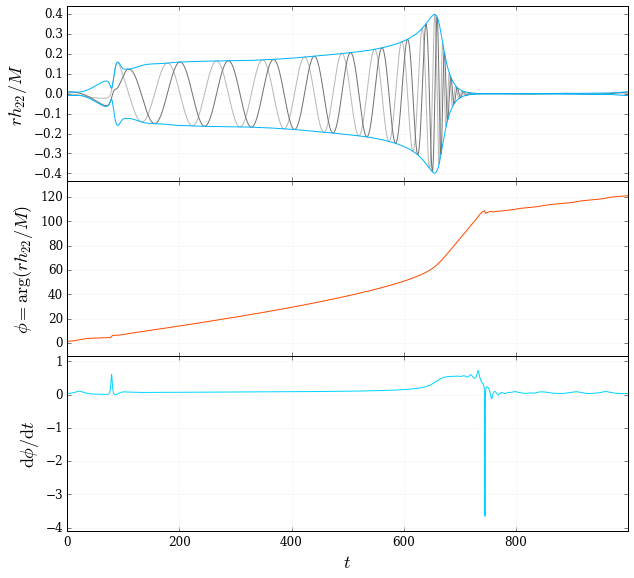

In [81]:
# Plot the strain waveform
y.hlm[0].plot(show=True);

### We are interested in ringdown

In [110]:
g = y.ringdown(T0=5,T1=30) # Here, T0 is where we will define ringdown to start in terms of M after the peak luminosity; in the same sense, T1 is where the waveform will terminate

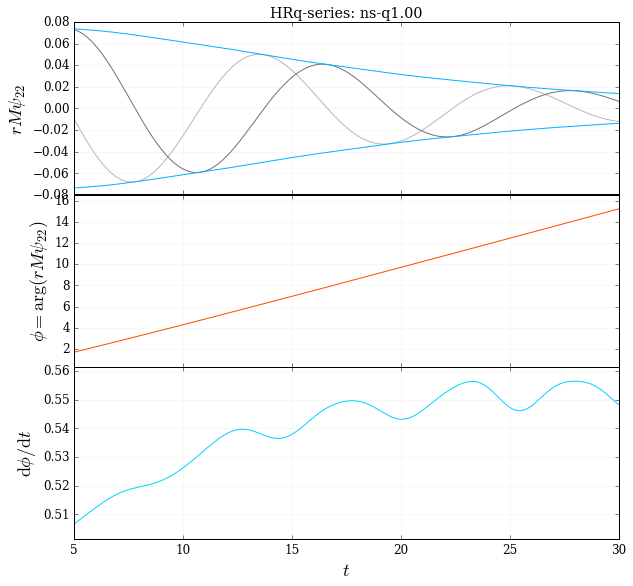

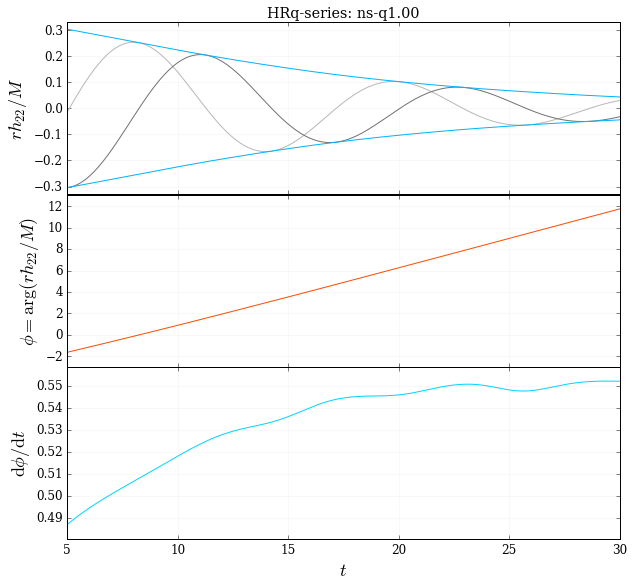

In [111]:
# Plot the strain and psi4 waveforms. NOTE that Ringdown in strain is of lower quality 
g.plot()

In [112]:
ll,mm,eta = 2,2,mmrdns.q2eta(A[0].m1/A[0].m2)
h = mmrdns.meval_spherical_mode(ll,mm,eta,kind='strain',gwfout=True)(g.hlm[0].t)

([<matplotlib.axes._subplots.AxesSubplot at 0x117de8810>,
 <matplotlib.figure.Figure at 0x11f2010d0>)

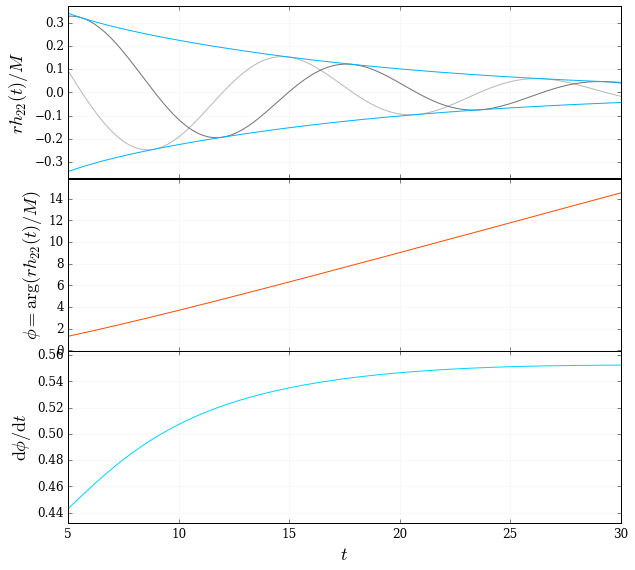

In [113]:
h.plot()

### Given the NR data for the l=m=2 mode, plot QNM components and MMRDNS in full

In [114]:
lmn = [ (2,2,0), (2,2,1) ]
hlm = []
for k in lmn:
    hlm.append( mmrdns.meval_spherical_mode(ll,mm,eta,kind='strain',mode=k,gwfout=True)(g.hlm[0].t) )

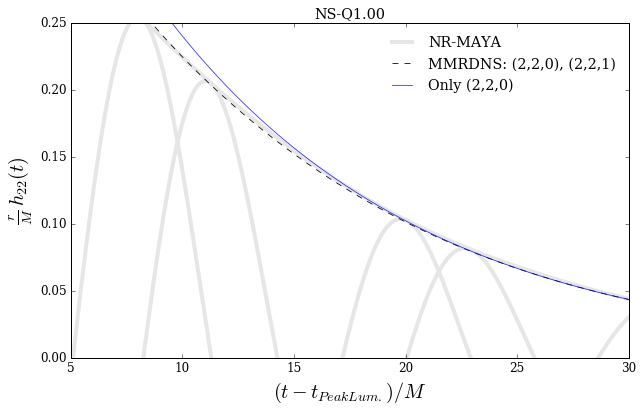

In [117]:
figure( figsize=2*array([5,3]) )
# gca().set_yscale("log", nonposy='clip')
ylim( [0, 0.25] )
# xlim( [min(hk.t),max(hk.t)] )
plot( g.hlm[0].t, g.hlm[0].amp, color=0.9*array([1,1,1]), linewidth=4, label='NR-MAYA' )
plot( g.hlm[0].t, g.hlm[0].plus, color=0.9*array([1,1,1]), linewidth=4 )
plot( g.hlm[0].t, g.hlm[0].cross, color=0.9*array([1,1,1]), linewidth=4 )
plot( h.t, h.amp, '--k', label='MMRDNS: (2,2,0), (2,2,1)' )
plot( hlm[0].t, hlm[0].amp, alpha=0.8, label='Only (2,2,0)' )

#
xlabel(r'$(t-t_{PeakLum.})/M$')
ylabel(r'$\frac{r}{M}\,h_{22}(t)$')
title(g.label.upper())
legend(frameon=False)

#
savefig('mmrdns_strain_comparison_%s_ll%imm%i.pdf'%(g.label.replace('-','_'),ll,mm))